In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


# Maße für die Relation zwischen Variablen

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In den vorangegangenen Abschnitten haben wir uns hauptsächlich auf eine einzelne Variable, die Beschreibung einer Verteilung und die Berechnung von zusammenfassenden Statistiken konzentriert. Statistiken, die eine einzelne Variable beschreiben, werden als <a href="https://de.wikipedia.org/wiki/Univariat">univariate Statistiken</a> bezeichnet. Untersucht man die Beziehung zwischen zwei Variablen, spricht man von <a href="https://de.wikipedia.org/wiki/Univariat#Verwendung_in_der_Mathematik">bivariater Statistik</a>. Wenn die Beziehungen zwischen mehreren Variablen gleichzeitig untersucht werden, spricht man von <a href="https://de.wikipedia.org/wiki/Multivariate_Verfahren">multivariaten Statistiken</a>. **Maße für die Relation** zwischen Variablen bieten die Möglichkeit, die Größe der Verknüpfung zwischen zwei Variablen zusammenzufassen.

## Kovarianz

Die <a href="https://de.wikipedia.org/wiki/Kovarianz_(Stochastik)">Kovarianz</a> ist ein Maß für die gemeinsame Variabilität von zwei Variablen. Die Kovarianz kann jeden Wert im Intervall $]-\infty \ $,$ \ +\infty[$ annehmen.

Die Kovarianz ist positiv, wenn die größeren/kleineren Werte der einen Variablen hauptsächlich mit den größeren/kleineren Werten der anderen Variablen übereinstimmen. Die Kovarianz ist negativ, wenn die Variablen tendenziell ein entgegengesetztes Verhalten zeigen. Die Kovarianz ist negativ, wenn die größeren Werte der einen Variablen hauptsächlich mit den kleineren Werten der anderen Variablen übereinstimmen.

Die Kovarianz, $s_{xy}$
wird durch die folgende Gleichung berechnet

$$s_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1}$$

Die **normalisierte Version der Kovarianz** wird **Korrelationskoeffizient** genannt, dessen Größe die Stärke einer linearen Beziehung zwischen zwei Variablen angibt.

## Korrelation

### Pearson-Produkt-Moment-Korrelationskoeffizient

Die Korrelation ist eine weit verbreitete Methode zur Untersuchung der Beziehung zwischen **quantitativen Variablen**. Die am häufigsten verwendete Statistik ist der **lineare Korrelationskoeffizient** $r$, der zu Ehren seines Entwicklers, <a href="https://de.wikipedia.org/wiki/Karl_Pearson">Karl Pearson</a>, auch als <a href="https://de.wikipedia.org/wiki/Korrelationskoeffizient">Pearson-Produkt-Moment-Korrelationskoeffizient</a> bekannt ist. Er ist gegeben durch

$$ r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{ \sum_{i=1}^n (y_i - \bar{y})^2}} = \frac{s_{xy}}{s_x s_y}$$

wobei $s_{xy}$ die Kovarianz von $x$ und $y$ und $s_x$ und $s_y$ die Standardabweichung von $x$ bzw. $y$ sind. Durch Division durch die Standardabweichungen der Stichprobe, $s_x$ und $s_y$, wird der lineare Korrelationskoeffizient, $r$, skalenunabhängig und nimmt Werte zwischen $-1$ und $1$ an.

Der lineare Korrelationskoeffizient misst die Stärke der linearen Beziehung zwischen zwei Variablen. Liegt $r$ nahe bei $\pm 1$, sind die beiden Variablen stark korreliert, und in einem Streudiagramm liegen die Datenpunkte um eine Linie herum. Liegt $r$ weit von $\pm 1$ entfernt, sind die Datenpunkte weiter gestreut. Liegt $r$ nahe bei $0$, sind die Datenpunkte im Wesentlichen um eine horizontale Linie gestreut, was darauf hindeutet, dass es fast keine lineare Beziehung zwischen den Variablen gibt.

![Alt-Text](_img/pearson.png)

Eine interessante Eigenschaft von $r$ ist, dass sein Vorzeichen die Steigung der linearen Beziehung zwischen zwei Variablen widerspiegelt. Ein positiver Wert von $r$ deutet darauf hin, dass die Variablen **positiv linear korreliert** sind, was bedeutet, dass $y$ tendenziell linear zunimmt, wenn $x$ zunimmt. Ein negativer Wert von $r$ deutet darauf hin, dass die Variablen **negativ linear korreliert** sind, was bedeutet, dass $y$ tendenziell linear abnimmt, wenn $x$ zunimmt.

Es gibt keine eindeutige Klassifizierungsregel für die Größe einer linearen Beziehung zwischen zwei Variablen. Die folgende Tabelle kann jedoch als Faustregel für den Umgang mit den numerischen Werten des Pearson-Produkt-Moment-Korrelationskoeffizienten dienen.

|||
|---|---|
|starke lineare Korrelation|$r > 0,9$|
|mittlere lineare Korrelation|$0,7 < r \le 0,9$|
|schwache lineare Korrelation|$0,5 < r \le 0,7$|
|keine oder zweifelhafte lineare Korrelation|$0 < r \le 0,5$|

Die Pearson-Korrelation setzt voraus, dass die Variablen annähernd normalverteilt sind, und sie ist bei Vorhandensein von Ausreißern nicht robust.

In einem späteren Abschnitt über lineare Regression wird das Bestimmtheitsmaß, $R^2$
ein anschauliches Maß für die Qualität von linearen Modellen. Es besteht eine enge Beziehung zwischen $R^2$ und dem linearen Korrelationskoeffizienten $r$. Das Bestimmtheitsmaß $R^2$ ist gleich dem Quadrat des linearen Korrelationskoeffizienten $r$.

$$\text{Determinationskoeffizient} (R^2) = r^2$$

### Korrelationskoeffizient nach Pearson: Ein Beispiel

Um ein Gefühl dafür zu bekommen, berechnen wir den Pearson-Produkt-Moment-Korrelationskoeffizienten in einem Beispiel. Dazu laden wir den `students` Datensatz in unseren Arbeitsbereich (Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen).

In [3]:
# Einlesen der Daten als Dataframe
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary*.

In diesem Beispiel wird **die lineare Beziehung zwischen dem Gewicht und der Größe der Studenten** untersucht. Dazu wählen wir zufällig $37$ Studenten aus und extrahieren die Variablen `height` und `weight` aus dem Datensatz.

In [4]:
# Wähle zufällige Stichprobe n=37 aus ohne doppelt auszuwählen
students_sample = students.sample(37, replace=False, random_state=1)

# Lese height und weight der Probe aus dem dataframe in Listen ein
height_sample = students_sample["height"]
weight_sample = students_sample["weight"]

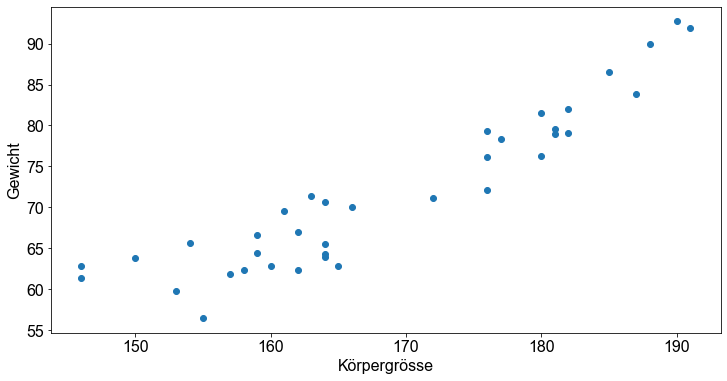

In [5]:
plt.scatter(height_sample, weight_sample, marker="o")
plt.xlabel("Körpergrösse")
plt.ylabel("Gewicht")
plt.show()

Das Streudiagramm zeigt, dass eine lineare Beziehung zwischen den beiden betrachteten Variablen besteht. Für diese Übung berechnen wir den linearen Korrelationskoeffizienten zunächst von Hand und wenden dann die `np.corrcoef()`-Funktion in Python an. Wir erinnern uns an die Gleichung von oben

$$ r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{ \sum_{i=1}^n (y_i - \bar{y})^2}} = \frac{s_{xy}}{s_x s_y}$$

In [6]:
s_xy = sum(
    (height_sample - height_sample.mean()) * (weight_sample - weight_sample.mean())
)
sx_sy = np.sqrt(sum((height_sample - height_sample.mean()) ** 2)) * np.sqrt(
    sum((weight_sample - weight_sample.mean()) ** 2)
)

s_xy / sx_sy

0.9295600715108283

Zur Überprüfung des Ergebnisses berechnen wir das Verhältnis der Kovarianz von $x$ und $y$ und die Standardabweichung von $x$ und $y$.

$$ r = \frac{s_{xy}}{s_x s_y} $$

In [7]:
# Berechne Kovarianz zwischen height_sample und weight_sample
s_xy = np.cov(height_sample, weight_sample)[0, 1]

# Berechne Standardabweichung für height_sample und weight_sample
std_height_sample = np.std(height_sample, ddof=1)
std_weight_sample = np.std(weight_sample, ddof=1)

# Berechne Pearsonkorrelationskoeffizienten
s_xy / (std_height_sample * std_weight_sample)

0.9295600715108282

Zum Schluss wenden wir die Funktion `np.corrcoef` an, die im `numpy` Modul enthalten ist.

In [8]:
np.corrcoef(weight_sample, height_sample)[0, 1]

0.9295600715108282

Perfekt! Die vier Berechnungen ergeben genau das gleiche Ergebnis! Der lineare Korrelationskoeffizient beträgt $r=0,9296$. Daraus können wir schließen, dass es einen starken linearen Zusammenhang zwischen der Größe und dem Gewicht eines Studenten gibt.

Natürlich ist eine Korrelationsanalyse nicht auf zwei Variablen beschränkt. Dank statistischer Softwarepakete, wie Python, können wir eine paarweise Korrelationsanalyse für mehr als zwei Variablen durchführen. Lassen Sie uns zunächst den Datensatz vorbereiten. Für eine bessere Visualisierung ziehen wir $100$ zufällig ausgewählte Studenten aus dem `students` Datensatz. Dann wählen wir eine numerische Variablen aus, um eine Korrelationsanalyse durchzuführen.

In [9]:
# Wähle zufällige Stichprobe n=100 aus ohne Zurücklegen auszuwählen
students_sample = students.sample(100, replace=False, random_state=42)
# Wähle nur numerische Variablen aus
students_sample = students_sample.select_dtypes("number")

students_sample.sample(10)

,age,height,weight,nc_score,score1,score2,online_tutorial,graduated,salary
stud_id,,,,,,,,,
214140,19,178,79.3,1.66,NaN,NaN,0,0,NaN
523713,21,194,91.5,1.62,NaN,NaN,0,0,NaN
870225,21,162,63.5,3.32,70.0,82.0,1,0,NaN
519478,20,168,69.6,2.12,71.0,72.0,1,1,34979.14
643038,24,184,85.1,3.42,71.0,77.0,1,1,41028.24
681278,21,158,60.8,1.03,55.0,52.0,1,0,NaN
515357,43,161,68.1,3.38,77.0,86.0,1,0,NaN
648227,24,187,91.0,1.94,51.0,50.0,0,1,41601.20
127799,20,174,77.2,1.40,NaN,NaN,0,0,NaN


Offensichtlich enthalten einige Variablen fehlende Werte, die als $NaN$ bezeichnet werden. Wir können diese Werte aus der Analyse ausschließen, indem wir die Methode `dropna()` hinzufügen.

In [10]:
# Entferne Spalten die NaN enthalten
students_sample_clean = students_sample.dropna(axis=0, how="any")
students_sample_clean.sample(10)

,age,height,weight,nc_score,score1,score2,online_tutorial,graduated,salary
stud_id,,,,,,,,,
462072,23,172,76.5,1.25,64.0,68.0,0,1,47556.44
679734,19,173,70.5,1.86,69.0,76.0,1,1,43441.64
834001,21,144,55.0,3.42,49.0,57.0,1,1,33726.58
725752,21,188,86.9,1.98,60.0,46.0,0,1,61663.58
759837,20,172,70.9,1.95,44.0,46.0,1,1,21582.80
519478,20,168,69.6,2.12,71.0,72.0,1,1,34979.14
163772,23,163,65.4,1.90,76.0,67.0,0,1,28235.06
225865,20,177,75.4,2.11,72.0,70.0,1,1,50078.33
112287,19,176,76.1,2.68,52.0,55.0,0,1,46075.27


Die Methode `corr()` liefert eine schöne Tabelle, auch **Korrelationsmatrix** genannt, mit den paarweisen Pearsonschen Korrelationskoeffizienten. 

In [11]:
students_sample_clean.corr()

,age,height,weight,nc_score,score1,score2,online_tutorial,graduated,salary
age,1.000000,-0.021219,0.046222,-0.277334,0.132991,0.073143,0.037136,NaN,-0.146958
height,-0.021219,1.000000,0.955495,-0.031163,-0.041360,-0.181769,-0.155009,NaN,0.467934
weight,0.046222,0.955495,1.000000,0.073386,-0.078268,-0.176928,-0.165820,NaN,0.473708
nc_score,-0.277334,-0.031163,0.073386,1.000000,-0.185161,-0.037330,-0.048404,NaN,0.037957
score1,0.132991,-0.041360,-0.078268,-0.185161,1.000000,0.860207,0.131912,NaN,0.165573
score2,0.073143,-0.181769,-0.176928,-0.037330,0.860207,1.000000,0.381767,NaN,-0.038099
online_tutorial,0.037136,-0.155009,-0.165820,-0.048404,0.131912,0.381767,1.000000,NaN,-0.325214
graduated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,-0.146958,0.467934,0.473708,0.037957,0.165573,-0.038099,-0.325214,NaN,1.000000


Eine Tabelle ist eine schöne Darstellung für eine Korrelationsanalyse, aber eine Abbildung würde natürlich die Interpretierbarkeit verbessern. Das Modul [seaborn](https://seaborn.pydata.org/) bietet die Funktion `pairplot` zur Darstellung von Korrelationsmatrizen.

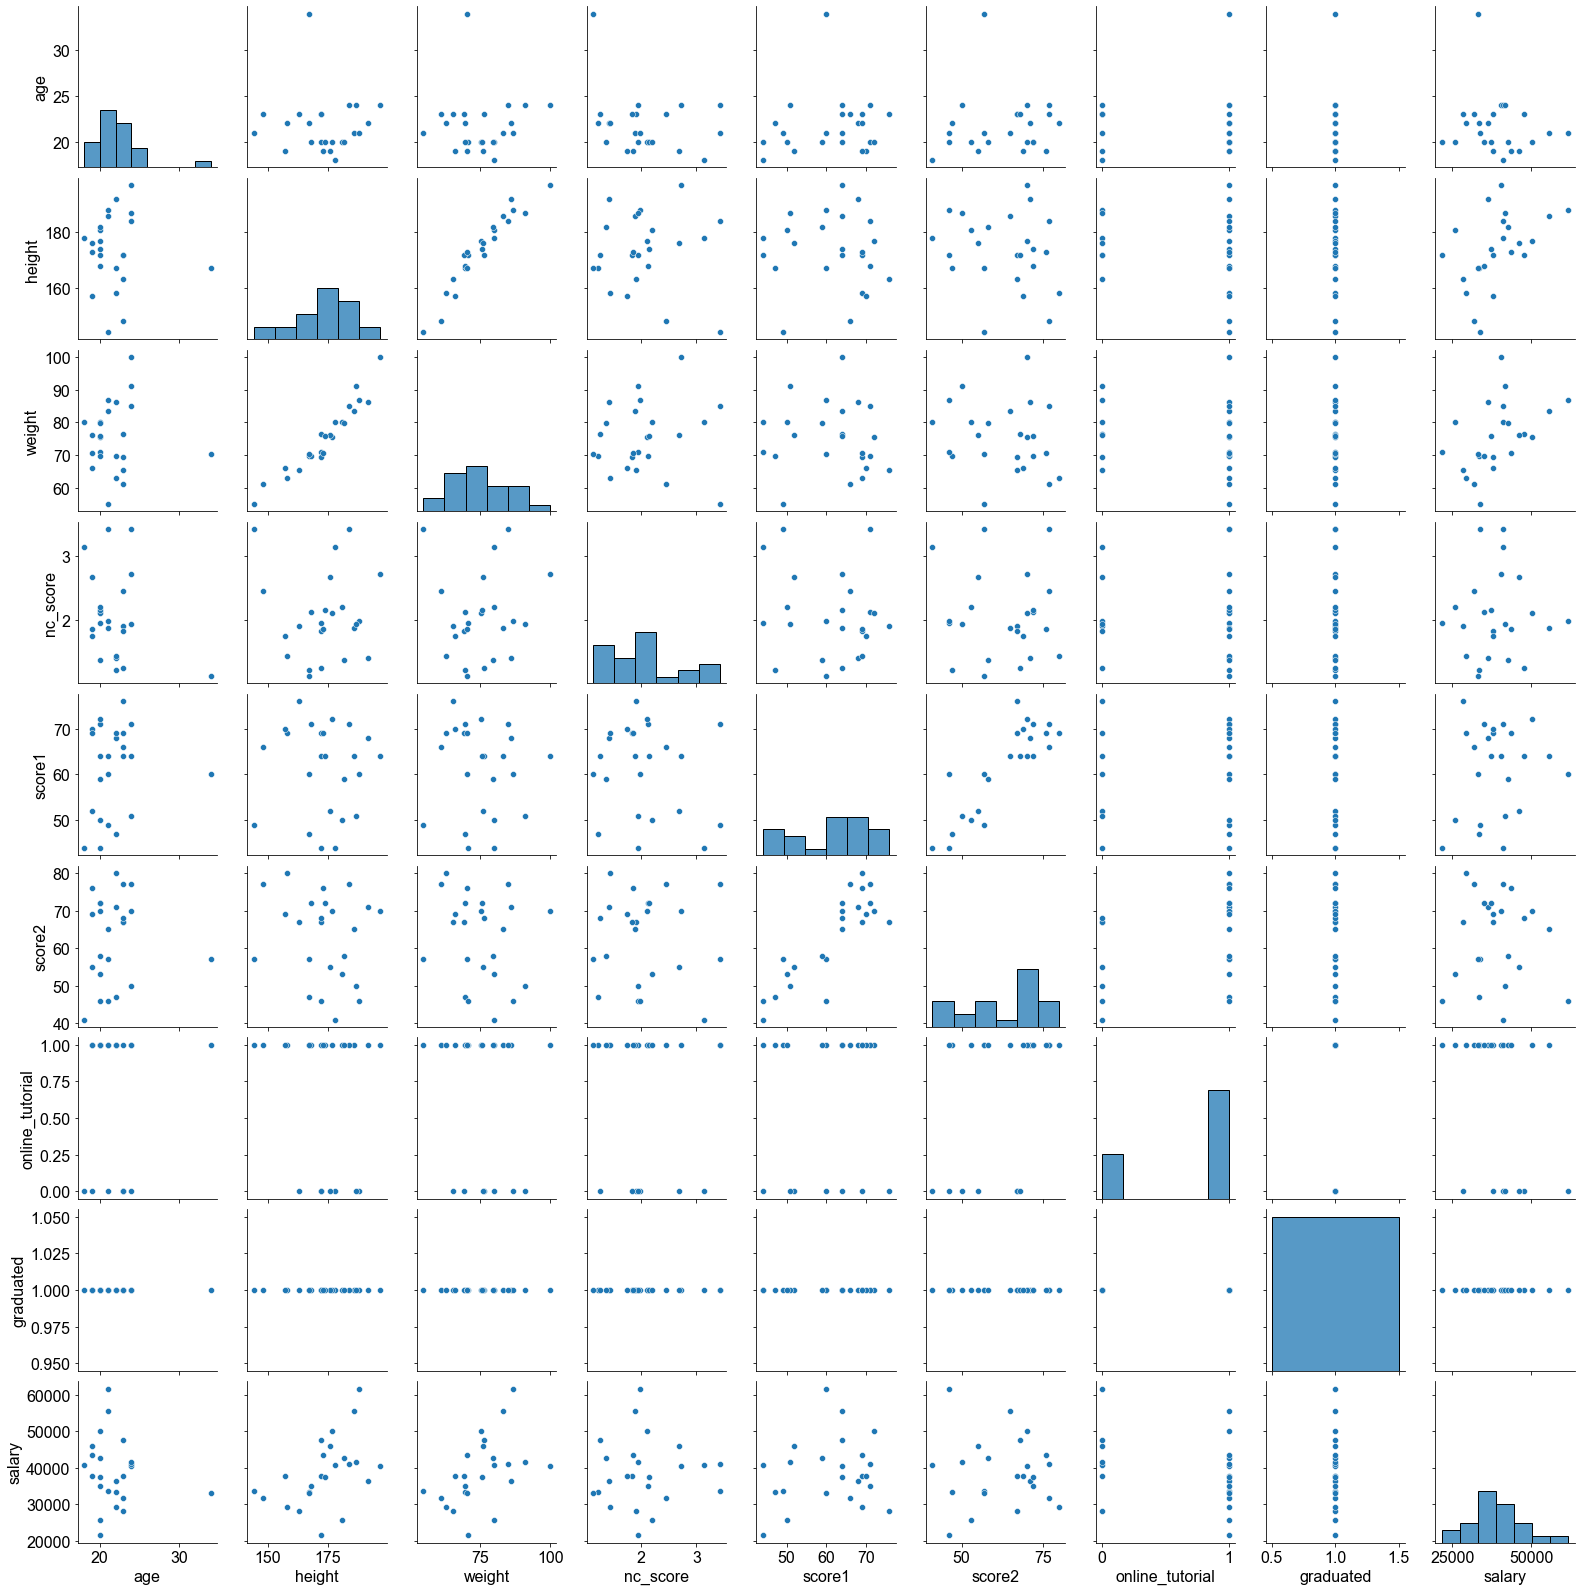

In [12]:
# Erzeuge Pair Plot
sns.pairplot(students_sample_clean)

Es fällt sofort auf, dass die Mehrzahl der Variablen nicht linear korreliert zu sein scheint. Im Gegensatz dazu scheinen die Variablenpaare `height` und `weight` sowie `score1` und `score2` positiv korreliert zu sein.

### Rangkorrelationskoeffizient nach Spearman

Der Rangkorrelationskoeffizient nach Spearman ({cite:p}`fahrmeirstatistik` s.133), auch bekannt als Spearmans $\rho$, ist ein nichtparametrischer Rangkorrelationskoeffizient. Er wurde von <a href="https://de.wikipedia.org/wiki/Charles_Spearman">Charles Spearman</a> entwickelt und ist eine Alternative zum Produkt-Moment-Korrelationskoeffizienten von Pearson. Der Spearman $\rho$ Rangkorrelationskoeffizient wird für Stichprobendaten mit $r_s$ und für Grundgesamtheitsdaten mit $\rho_s$ bezeichnet (Mann 2012). Der Korrelationskoeffizient bewertet die monotone Beziehung zwischen zwei Variablen und liegt zwischen $-1$ und $1$. Er beschreibt die lineare Korrelation zwischen den Rängen der Daten zu den Variablen $x$ und $y$. Die Spearman-Korrelation ist hoch, wenn die Variablen einen ähnlichen Rang haben, und niedrig, wenn die Variablen einen ungleichen Rang haben.

Um $r_s$ zu berechnen, werden die Daten für jede Variable, $x$ und $y$, getrennt eingestuft. Die Differenz zwischen jedem Paar von Rängen bezeichnen wir mit $d$. Für eine gegebene bivariate Sequenz $(x_1,y_1),(x_2,y_2), \dots,(x_n,y_n)$ ist Spearmans $r_s$ gegeben durch

$$ r_s = 1 - \frac{6 \sum_{i=1}^n (r_{xi} - r_{yi})^2}{n(n^2 -1)} $$

wobei $r_{xi}=Rank(x_i)$ , $r_{yi}=Rank(y_i)$ , und $n$
die Stichprobengröße ist.

Im Gegensatz zum linearen Korrelationskoeffizienten von Pearson ist der lineare Koeffizient von Spearman sowohl für quantitative als auch für ordinale Variablen geeignet. Außerdem sind rangbasierte Korrelationen nicht von der Normalverteilungsannahme abhängig und resistenter gegenüber Ausreißern ({cite:p}`fahrmeirstatistik` s.135).

### Spearman's Rangkorrelationskoeffizient: Ein Beispiel

Betrachten wir ein Beispiel. Die Bevölkerung einer Gemeinde an einem Fluss ist der Meinung, dass der jüngste Anstieg der Abflussspitzen auf die Abholzung durch ein Holzunternehmen in den letzten Jahren zurückzuführen ist. Wir berechnen den Spearman'schen Rangkorrelationskoeffizienten, um festzustellen, ob es eine Korrelation zwischen dem Spitzenabfluss und dem Anteil der abgeholzten Fläche im Wassereinzugsgebiet gibt (Daten geändert nach <a href=https://www.routledge.com/Modeling-Hydrologic-Change-Statistical-Methods/McCuen/p/book/9781566706001>McCuen 2003, S. 112</a>).

|Jahr|Abflussspitzen $(m^3s^{-1})$|abgeholzten Fläche (%)|
|---|:---:|:---:|
|1982|227|53|
|1983|249|56|
|1984|210|57|
|1985|190|58|
|1986|314|55|
|1987|345|54|
|1988|161|51|
|1989|266|50|
|1990|402|49|
|1991|215|47|
|1992|164|46|
|1993|405|44|
|1994|328|43|
|1995|294|42|


Lassen Sie uns unsere Datenvektoren konstruieren. Wir ordnen die Abflusswerte der Variablen `Q` und die abgeholzte Fläche der Variablen `logged` zu.

In [13]:
# Erzeuge Listen Q, logged
q = [227, 249, 210, 190, 314, 345, 161, 266, 402, 215, 164, 405, 328, 294]
logged = [53, 56, 57, 58, 55, 54, 51, 50, 49, 47, 46, 44, 43, 42]

# Erzeuge Dataframe aus Q und logged
df = pd.DataFrame({"Q": q, "Logged": logged})
df

,Q,Logged
0,227,53
1,249,56
2,210,57
3,190,58
4,314,55
5,345,54
6,161,51
7,266,50
8,402,49
9,215,47


Zunächst berechnen wir den Spearman'schen Rangkorrelationskoeffizienten per Hand. Erinnern Sie sich an die Gleichung

$$ r_s = 1 - \frac{6 \sum_{i=1}^n (r_{xi} - r_{yi})^2}{n(n^2 -1)} $$

wobei $r_{xi}=Rang(x_i)$ , $r_{yi}=Rang(y_i)$ , und $n$ der Stichprobenumfang ist. Wir verwenden die Methode `rank()`, um den Rang für die Werte jeder Variablen zu berechnen.

In [14]:
rs = 1 - (
    6
    * sum((df.rank()["Q"] - df.rank()["Logged"]) ** 2)
    / (df.shape[0] * (df.shape[0] ** 2 - 1))
)
rs

-0.34065934065934056

Alternativ können wir auch die Funktion `corr()` in Python verwenden und das Argument `method = 'spearman'` hinzufügen.

In [15]:
df.corr(method="spearman")

,Q,Logged
Q,1.000000,-0.340659
Logged,-0.340659,1.000000


Der Rangkorrelationskoeffizient von Spearman ist nichts anderes als der lineare Korrelationskoeffizient von Pearson für die gerankten Daten. Das Ergebnis der folgenden Codezelle sollte mit den vorherigen Ergebnissen übereinstimmen.

In [16]:
df.rank().corr()

,Q,Logged
Q,1.000000,-0.340659
Logged,-0.340659,1.000000


Perfekt, wir erhielten das gleiche Ergebnis durch alle drei Berechnungen, die einen Spearman's Rangkorrelationskoeffizienten von $r_s = -0,34$ ergeben. Die Ergebnisse deuten darauf hin, dass es keine bis eine schwache negative Korrelation zwischen dem Spitzenabfluss und der Einschlagsfläche gibt. Mit anderen Worten, der Abfluss nimmt tendenziell ab, wenn die Abholzungsfläche zunimmt. Die Wahrnehmung der Bevölkerung kann also durch unsere statistische Analyse nicht bestätigt werden. Es wird empfohlen, einen statistischen Test durchzuführen, um festzustellen, ob das Ergebnis statistisch signifikant ist oder ob die Abweichung nur zufällig ist. Weitere Informationen finden Sie in den Abschnitten über *Hypothesentests*.

## Kontingenzkoeffizient

Der **Kontingenzkoeffizient** $C$ ist ein $\chi ^2$-basiertes Maß für die Assoziation von kategorialen Daten. Er stützt sich auf den <a href="https://de.wikipedia.org/wiki/Chi-Quadrat-Test">$\chi ^2$-Test auf Unabhängigkeit</a>. Die $\chi ^2$ Statistik ermöglicht es zu beurteilen, ob eine statistische Beziehung zwischen den Variablen in den <a href="https://de.wikipedia.org/wiki/Kontingenztafel">Kontingenztabellen</a> (auch bekannt als Kontingenztafeln oder Kreuztabellen) besteht oder nicht. In dieser Art von Tabellen wird die Verteilung der Variablen in einem Matrixformat dargestellt.

Für die Berechnung des **Kontingenzkoeffizienten** $C$
zu berechnen, müssen wir die $\chi ^2$-Statistik im Voraus bestimmen.

### Berechnung der $\chi ^2$-Statistik

Die $\chi ^2$-Statistik ist gegeben durch
$$\chi^2= \sum{\frac{(O-E)^2}{E}}\text{,}$$

wobei $O$ für die beobachtete Häufigkeit und $E$ für die erwartete Häufigkeit steht. Bitte beachten Sie, dass $\frac{(O-E)^2}{E}$ für jede Zelle ausgewertet und dann aufsummiert wird.

Anhand eines Beispiels soll die Berechnung der $\chi ^2$-Statistik auf der Grundlage kategorialer Beobachtungsdaten näher erläutert werden. Nehmen wir eine Prüfung am Ende des Semesters. Es gibt drei Gruppen von Studierenden: Die Studierenden haben entweder bestanden, nicht bestanden oder nicht an der Prüfung teilgenommen. Außerdem wird die Anzahl der Übungen, die jeder einzelne Studierende während des Semesters absolviert hat, in vier Gruppen eingeteilt: Keine, weniger als die Hälfte $(\lt 0,5)$, mehr als die Hälfte $(\ge 0,5)$, alle.

Die resultierende Kontingenztabelle sieht wie folgt aus:

| |Keine|$<0,5$|$\geq 0,5$|Alle|
|---|:---:|:---:|:---:|:---:|
|erfolgreich|12|13|24|14|
|nicht erfolgreich|22|11|8|6|
|nicht teilgenommen|11|14|6|7|

Zunächst konstruieren wir ein `dataframe` Objekt und geben ihm den Namen `obs`, um uns daran zu erinnern, dass diese Daten der beobachteten Häufigkeit entsprechen:

In [17]:
# Erzeuge neues Dataframe obs
col1 = ["erfolgreich", "nicht erfolgreich", "nicht teilgenommen"]
col2 = [12, 22, 11]
col3 = [13, 11, 14]
col4 = [24, 8, 6]
col5 = [14, 6, 7]

obs = pd.DataFrame(
    {"Keine": col2, "<0.5": col3, ">0.5": col4, "Alle": col5}, index=col1
)
obs

,Keine,<0.5,>0.5,Alle
erfolgreich,12,13,24,14
nicht erfolgreich,22,11,8,6
nicht teilgenommen,11,14,6,7


Perfekt, jetzt haben wir eine ordentliche Darstellung unserer Daten in Python. Allerdings fehlt noch ein Teil, um eine Kontingenztabelle zu vervollständigen. Die Zeilensummen und Spaltensummen.

Es gibt mehrere Möglichkeiten, die Zeilen- und Spaltensummen in Python zu berechnen. Unter anderem kann man die Funktion `sum(df, axis=0,1)` verwenden. Die Funktion benötigt zwei Argumente, die Daten und eine Zahl, die angibt, ob die Daten zeilen- oder spaltenweise vorliegen.

In [18]:
# Berechne Zeilen/Spaltensumme
columnsum = obs.sum(axis=0).values
rowsum = obs.sum(axis=1).values

print(f"Spaltensummen: {columnsum}")
print(f"Zeilensummen:  {rowsum}")

Spaltensummen: [45 38 38 27]
Zeilensummen:  [63 47 38]


Setzt man alle Teile zusammen, sieht die Kontingenztabelle wie folgt aus:

| |Keine|$<0,5$|$\geq 0,5$|Alle|Zeilensumme|
|---|:---:|:---:|:---:|:---:|:---:|
|erfolgreich|12|13|24|14|63|
|nicht erfolgreich|22|11|8|6|47|
|nicht teilgenommen|11|14|6|7|38|
|Spaltensumme|45|38|38|27|

Toll, jetzt haben wir eine Tabelle mit den beobachteten Häufigkeiten. Im nächsten Schritt berechnen wir die erwarteten Häufigkeiten. Um die erwarteten Häufigkeiten $(E)$ zu berechnen, wenden wir diese Gleichung an:

$$E = \frac{R\times C}{n} \text{,}$$

wobei $R$ die Zeilensumme, $C$ die Spaltensumme und $n$ der Stichprobenumfang ist. Bitte beachten Sie, dass wir die erwartete Häufigkeit für jeden einzelnen Tabelleneintrag berechnen müssen, d. h. wir müssen $3 \times 4=12$ Berechnungen durchführen. Auch hier bietet Python mehrere Möglichkeiten, diese Aufgabe zu lösen. Man kann eine verschachtelte for-Schleife bauen, um jede Zelle zu durchlaufen und die Berechnungen schrittweise durchzuführen, das ist definitiv in Ordnung! Wir können aber auch die vektorisierte und damit viel schnellere Funktion `outer()` in Kombination mit der Funktion `sum()` verwenden. Wir weisen das Ergebnis einer Variablen mit der Bezeichnung `exp` zu, um uns daran zu erinnern, dass diese Tabelle den erwarteten Häufigkeiten entspricht.

In [19]:
exp = np.outer(columnsum, rowsum) / sum(columnsum)
exp

array([[19.15540541, 14.29054054, 11.55405405],
       [16.17567568, 12.06756757,  9.75675676],
       [16.17567568, 12.06756757,  9.75675676],
       [11.49324324,  8.57432432,  6.93243243]])

Im nächsten Schritt erstellen wir aus den Ergebnissen einen Dataframe der dieselbe Spalten- und Zeilenanzahl, denseben Index und dieslelben Spaltennamen hat wie der `obs` Dataframe.

In [20]:
exp = pd.DataFrame(np.transpose(exp), index=obs.index, columns=obs.columns)
exp

,Keine,<0.5,>0.5,Alle
erfolgreich,19.155405,16.175676,16.175676,11.493243
nicht erfolgreich,14.290541,12.067568,12.067568,8.574324
nicht teilgenommen,11.554054,9.756757,9.756757,6.932432


Im nächsten Schritt berechnen wir schließlich die $\chi ^2$-Statistik. Erinnern Sie sich an die Gleichung:

$$\chi^2= \sum{\frac{(O-E)^2}{E}}\text{,}$$

wobei $O$ für die beobachtete Häufigkeit und $E$ für die erwartete Häufigkeit steht.

In [21]:
# Berechne chisqVal
chisqVal = np.sum(((obs.values - exp.values) ** 2) / exp.values)
chisqVal

17.344387665138406

### Berechnung des Kontingenzkoeffizienten $C$

Der Kontingenzkoeffizient, bezeichnet als $C^∗$, passt die $\chi ^2$-Statistik um den Stichprobenumfang $(n)$ an. Er kann wie folgt geschrieben werden

$$ C^*=\sqrt{\frac{\chi^2}{n+\chi^2}}\text{,} $$

wobei $\chi ^2$ der $\chi ^2$-Statistik entspricht und $n$ die Anzahl der Beobachtungen bezeichnet. Wenn keine Beziehung zwischen zwei Variablen besteht, ist $C^∗=0$. Der Kontingenzkoeffizient $C^∗$ kann Werte $\gt 1$ nicht überschreiten, aber der Kontingenzkoeffizient kann kleiner als $1$ sein, selbst wenn zwei Variablen perfekt miteinander verbunden sind. Dies ist nicht so wünschenswert, daher wird $C^∗$ so angepasst, dass er maximal $1$ erreicht, wenn in einer Tabelle mit einer beliebigen Anzahl von Zeilen und Spalten ein vollständiger Zusammenhang besteht. Daher berechnen wir $C^{∗}_{max}$, das ist

$$ C^*_{max}=\sqrt{\frac{k-1}{k}}\text{,} $$

wobei $k$ die Anzahl der Zeilen oder die Anzahl der Spalten ist, je nachdem, welcher Wert kleiner ist, $k=min(\text{Zeilen,Spalten})$. Dann wird der bereinigte Kontingenzkoeffizient wie folgt berechnet

$$ C=\frac{C^*}{C^*_{max}}=\sqrt\frac{k \cdot \chi^2}{(k-1)(n+\chi^2)} $$

Im obigen Abschnitt wurde die $\chi ^2$-Statistik der Variablen `chisqVal` zugeordnet und als $17,3443877$ berechnet. Nun setzen wir diesen Wert in die Gleichung für den Kontingenzkoeffizienten $C^∗$ ein.

In [22]:
C_star = np.sqrt(chisqVal / (sum(columnsum) + chisqVal))
C_star

0.3238804670641156

Der Kontingenzkoeffizient $C^∗$ beläuft sich auf $0,3238805$.

Nun wenden wir die Gleichung für den bereinigten Kontingenzkoeffizienten, $C$.

In [23]:
k = [obs.shape[0], obs.shape[1]]
k = min(k)
k

3

In [24]:
C_star_max = np.sqrt((k - 1) / k)
C = C_star / C_star_max
C

0.39667094098068806

Der bereinigte Kontingenzkoeffizient $C$ wird mit $0,3966709$ bewertet. Zur Erinnerung: Der Kontingenzkoeffizient reicht von $0$ bis $1$. Ein Kontingenzkoeffizient von $0,4$ deutet nicht auf einen starken Zusammenhang zwischen den Prüfungsergebnissen und der Bereitschaft der Studierenden hin, die Übungen während des Semesters zu bearbeiten.